<h1><center><bold>ImageMining:
Atelier N°1: CBIR</bold>

## Abdelazyz RKHISS
    
    
    
Rkhissabdelazyz781@gmail.com</center></h1>

<div>
    <img src='moi.jpg' hight='400' style ="text-align : right">
</div>



### Table des matières :
<h5></br>
    
[1 - Introduction](#1)</br>

[2 - Base d’images](#2)</br>

[3 - Implémentation](#3)</br>

 
[3.1 - Lecture des images](#4)</br> 

[3.2 - Recherche par image entière](#5)</br>

[3.3 - Recherche par Couleur](#6)</br>

[3.4 - Recherche par Histogramme](#7)</br>

[3.5 - Recherche par texture](#8)</br>

[3.6 - Recherche par Forme ](#9)</br>

[3.7 - Le vecteur generale](#10)</br>

[3.8 - Robustesse vis-à-vis des transformations géométriques](#11)</br>



[4 - Conclusion](#12)</br>


</h5>

<a name='1'></a>
<h2>1	Introduction</h2>

L’objectif de cet atelier est d’initier le lecteur aux systèmes de recherches basées sur le contenu (CBIR, Content Based Image Retrieval). Le CBIR permet entre autres de rechercher les images similaires à une image requête dans une base, constituées, d’images. Cette similarité est calculée non pas sur les images elles-mêmes mais par le biais d’une description (descripteur) choisie par celui qui a conçu le système. La figure ci-dessous présente une vue globale d’un système CBIR.

Un système CBIR est organisé en deux phases :

1.	Phase hors ligne, appelée souvent indexation, où pour chaque image un vecteur descripteur sera extrait et sauvegarder sous forme de base d’indexes
2.	Phase en ligne, appelée souvent recherche, où le système recherche les images similaires à une image requête. Le même type de descripteur sera extrait de l’image requête et comparé avec la base d’indexes. 

Deux paramètres sont à prendre en considération lors de l’élaboration d’un système CBIR; le premier est la nature des descripteurs (appelés aussi caractéristiques) à utiliser pour former la base d’indexes, et le deuxième c’est la mesure de similarité à utiliser pour chercher les images les plus similaires pour une image requête. Ainsi, la recherche ce fait par mesure de distance entre descripteurs au lieu des images. 

Les descripteurs utilisés pour former la base d’indexes sont généralement des descripteurs bas niveau, à savoir ; la forme, la couleur et la texture. Et la mesure de similarité utilisée peut être une simple distance euclidienne ou une projection multidimensionnelle. 

<h2>2	Base d’images</h2>
<a name='2'></a>

Pour cet atelier nous allons utiliser une partie de la base d’images COREL. La base COREL contient 10800 images classées en 80 groupes d’images. Cette base est parfaite pour comprendre les fondamentaux du CBIR. Ici, nous allons utiliser seulement 270 images appartenant à deux groupes d’images et qui sont regroupées dans seule dossier. <br>
Il faut charger la base aprés l'avoir décompresser sur votre espace Drive. Il est possible d'utiliser une base compresser (.*zip) et la décompresser par code python.

<a name='3'></a>
<h2>3	Implémentation</h2>
Afin de développer notre système CBIR nous avons opté, dans cet atelier, pour Matlab comme environnement de travail car il est très puissant dans le traitement matriciel et ainsi pour le traitement d’images de même que plusieurs fonctionnalités sont déjà implémentées permettant de créer facilement notre CBIR.

Pour la première étape qui est l’indexation, le premier code à écrire est pour parcourir toutes les images de la base de données pour extraire de chacune un vecteur descripteur convenable. 
- Copier la base d’images dans le dossier par défaut de Matlab pour éviter les 
- Ne pas écrire le code directement sur l’invite de commande mais plutôt créer un ou plusieurs fichiers *.m, les modifier et les exécuter à fur et à mesure de l’avancement de cet atelier. 

<a name='4'></a>
<h2>3.1	Lecture des images</h2>
L’objectif du premier code  est de lire toutes les images de la base et d’afficher les 6 premières


In [3]:
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    print(' %s %s ' % (filename, img_data.shape))

 2587.jpg (80, 120, 3) 
 382001.jpg (80, 120, 3) 
 382002.jpg (80, 120, 3) 
 382006.jpg (80, 120, 3) 
 382007.jpg (80, 120, 3) 
 382012.jpg (80, 120, 3) 
 382013.jpg (80, 120, 3) 
 382014.jpg (80, 120, 3) 
 382018.jpg (80, 120, 3) 
 382019.jpg (80, 120, 3) 
 382020.jpg (80, 120, 3) 
 382021.jpg (80, 120, 3) 
 382022.jpg (80, 120, 3) 
 382025.jpg (80, 120, 3) 
 382026.jpg (80, 120, 3) 
 382028.jpg (80, 120, 3) 
 382029.jpg (80, 120, 3) 
 382030.jpg (80, 120, 3) 
 382032.jpg (80, 120, 3) 
 382033.jpg (80, 120, 3) 
 382034.jpg (80, 120, 3) 
 382035.jpg (80, 120, 3) 
 382037.jpg (80, 120, 3) 
 382038.jpg (80, 120, 3) 
 382039.jpg (80, 120, 3) 
 382041.jpg (80, 120, 3) 
 382042.jpg (80, 120, 3) 
 382043.jpg (80, 120, 3) 
 382044.jpg (80, 120, 3) 
 382045.jpg (80, 120, 3) 
 382047.jpg (80, 120, 3) 
 382050.jpg (80, 120, 3) 
 382051.jpg (80, 120, 3) 
 382053.jpg (80, 120, 3) 
 382054.jpg (80, 120, 3) 
 382056.jpg (80, 120, 3) 
 382061.jpg (80, 120, 3) 
 382062.jpg (80, 120, 3) 
 382063.jpg (8

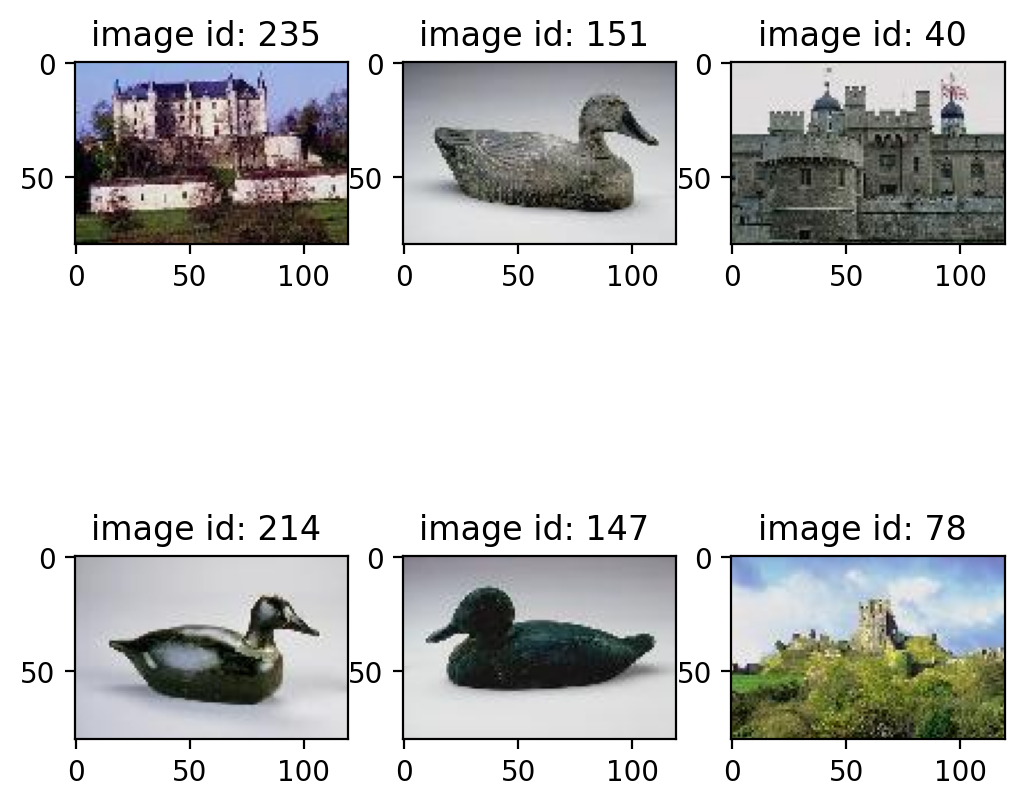

In [4]:
# Afficher les 6 premières images

fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
    ax1 = fig.add_subplot(2, 3, i+1)
    ax1.imshow(loaded_images[id[i]])
    ax1.set_title('image id: %s '% (id[i]))





<a name='5'></a>

<h2>3.2	Recherche par image entière</h2>
Pour une première implémentation d’un système CBIR, l’objectif est d’afficher les 5 images les plus similaires à l’image requête « Imrequest.jpg » en se basant sur un calcul de différence entre images entières.<br>
L'image requete est dans un dossier "img_requetes" dans Drive

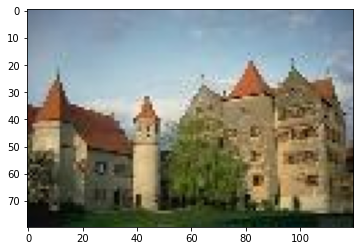

In [5]:
img_requete = image.imread('C:\\Users\\Zizu\\Downloads\\s3 cours et projets\\image mining\\ImageRequete.jpg')
plt.imshow(img_requete)

In [6]:
x=img_requete.flatten()

Nous allons utiliser la distance enclidienne entre l'image requéte et toutes 

1.   Élément de liste
2.   Élément de liste

les images de la base. Les distances seront enregistrées dans un dictionnaire et seront par la suite triées par ordre croissant. 

In [7]:
# Comparer les pixels des deux images utilisant une distance enculidienne
import scipy.spatial.distance as dist
# penser à utiliser un dictionnaire pour garder les indices aprés tri
distances = {}
for i in range (len(loaded_images)):    
    e=loaded_images[i].flatten()
    g= img_requete.flatten()
    s=dist.euclidean(e, g)
    distances[i]=s
  # Code pour calculer la distance eulcidienne entre l'image requête et les images de la base
  # Il faut convertir les matrices 3D en un vecteur 1D en utilisant la méthode flatten()
    
  # Utiliser la méthode dist.euclidean(Vecteur1, vecteur2)
# Code pour trier les distances par ordre croissant
e=[]    
for k, v in sorted(distances.items(), key=lambda x: x[1]):
    print("%s: %s" % (k, v))
    e.append(k)

# Afficher les distances aprés tri


59: 0.0
108: 18580.05266408037
212: 20290.041720016252
211: 20439.24218262507
101: 20595.815133176933
218: 20627.608271440487
213: 20853.72882723855
78: 20918.277295226773
72: 21109.810183893176
216: 21197.695346428583
157: 21246.240702769042
215: 21328.829081785057
124: 21542.12431493236
18: 21569.355646379427
135: 21682.438746598593
244: 21751.36379632321
214: 21848.92317712706
75: 21918.55424064279
34: 22092.608605594767
17: 22126.370466029894
259: 22136.461302565956
86: 22173.694617722143
233: 22209.73367692643
229: 22356.307297941672
13: 22379.794391370087
120: 22442.829968611357
94: 22510.675489642686
5: 22516.44123746024
131: 22517.493799266384
217: 22533.681789712038
132: 22615.823509215843
105: 22641.725707198202
158: 22655.771692882146
80: 22783.961025247565
91: 22828.701452338457
2: 22854.641716727918
12: 23089.15260463233
100: 23102.5031544203
156: 23128.82990987655
113: 23144.977316903984
129: 23162.475817580467
189: 23234.017517424745
121: 23378.75995428329
41: 23381.0468

Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

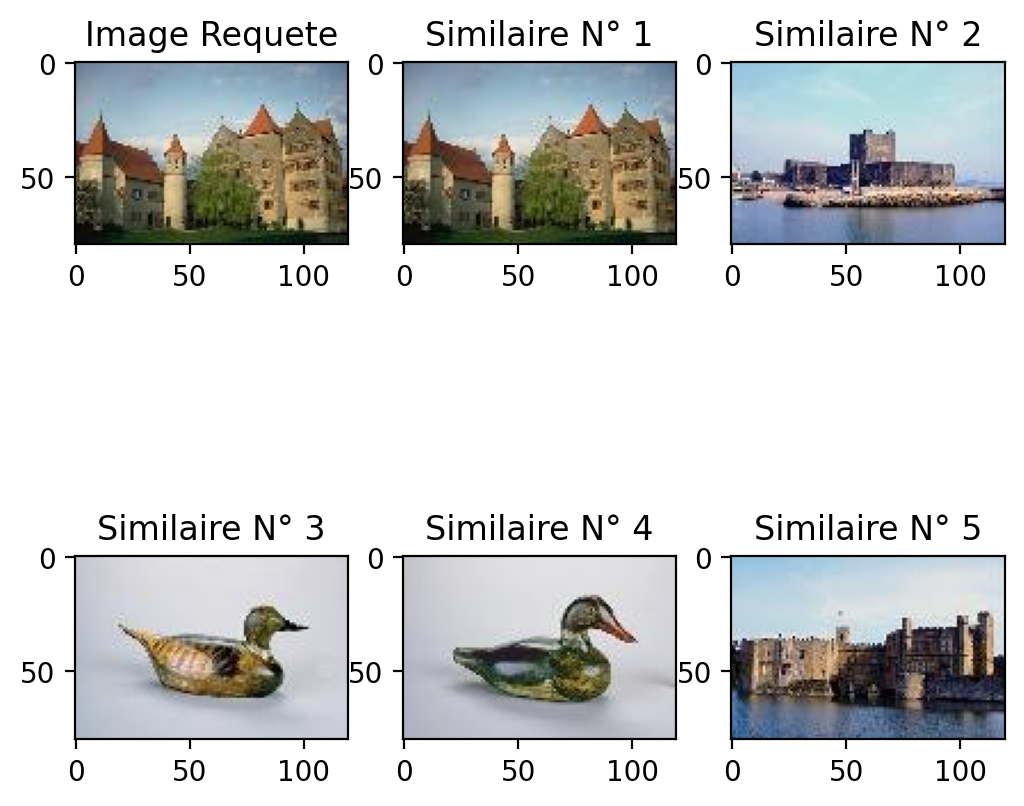

In [8]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=e[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

In [9]:
len(loaded_images)

270

In [10]:
img_requete[:, :, 2 ].shape

(80, 120)

La première image trouvée est identique à l’image requête ce qui montre que le système développé a pu répondre à la requête correctement tandis que les autres images ne sont pas visuellement très similaires. L’autre inconvénient et qui est majeur et qu’il est long en termes de temps de recherche et très gourment en mémoire. Ainsi, le temps de recherche sur la base de seulement 270 images est de 45 secondes. Aussi, il n’est pas du tout robuste vis-à-vis des transformations sur l’image. Pour exemple vous pouvez roter l’image requête et vous allez voir que le résultat est complétement erroné. <br>
L’idéal est, qu’au lieu de chercher sur la totalité des images, d’utiliser avec des caractéristiques (descripteurs) de chaque image. 3 types de caractéristiques sont les plus utilisées dans un système CBIR : la Couleur, la Forme et la Texture. <br>
Par la suite, nous allons présenter et utiliser chacune des 3 caractéristiques pour créer un système CBIR performant et puissant.


<a name='6'></a>


<h2>3.3	Recherche par Couleur</h2>

Dans cette partie, la caractéristique couleur sera utilisée pour développer notre système CBIR. Contrairement à la recherche par similarité sur toute l’image qui consiste à calculer la différence entre l’image requête et toutes les images de la base, et ceci à chaque recherche, le CBIR consiste dans sa partie hors-ligne de créer une base d’index à base des caractéristiques des images de la base et la recherche est effectuée par similarité entre caractéristiques de l’image requête et caractéristiques de la base d’index. Tout cela nous ramène à dire que la première étape est d’extraire, une fois pour toute, les caractéristiques couleurs des images de la base et l’enregistrer afin de l’utiliser dans chaque recherche. <br>
Le vecteur descripteur couleur à utiliser est constitué des valeurs des moments statistiques ; moyenne et variance de chaque composante couleur R, G et B. La taille du vecteur sera donc 6.<br>
Le code dans le fichier « CBIR_Color.m » permet en un premier temps d’indexer la base d’image et après de lancer la recherche pour une image requête et d’afficher les 5 images les plus similaires.
Le code contient 3 parties : <br>

1. La partie principale
2. La partie d’indexation ; la fonction « CBIR_Indexation » est appelée avec comme paramètre la taille du vecteur descripteur. Cette partie ne doit être exécutée qu’une seule fois<br>
3. La partie de recherche ; la fonction « CBIR_ Recherche » est appelée avec comme paramètres l’image requête, la matrice des descripteurs et les noms des images correspondantes.

Le vecteur descripteur est créé par la fonction « getFeatures » qui a comme arguments d’entrée l’image et la taille du vecteur. C’est cette fonction qu’on va modifier pour ajouter d’autres descripteurs par la suite. Cette fonction appelle la fonction « color_Moments » qui va retourner le les 6 moments de couleurs.


In [11]:
del(loaded_images)

In [12]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles

In [13]:
# la CBIR est constituée de 2 étapes; Indexation et Recherche
# On va créer une fonction pour l'indexation d'une image 
# C'est l'équivalent d'extraire une vecteur descripteur en se basant sur les moments statistiques des couleurs
import numpy as np
# la fonction color_Moment retourne un vecteur descripteur de 6 valeurs
# contenant la moyenne et la déviation standard de chaque canal RGB
# utiliser np.mean et np.std
# il faut normaliser les moments en les divisant par la moyenne
def color_Moments(img):
    colorFeatures = []
    for i in range(3):
        colorFeatures.append(np.mean(img[:, :, i]))
        colorFeatures.append(np.std(img[: , :, i]))
    
    colorFeatures=np.array(colorFeatures)
    return colorFeatures

# l'indexation consiste à créer une matrice d'index utilisant les moments de couleurs pour chacune des images de la base
# La méthode CBIR_Indexation retourne la matrice de caractéristiques
def CBIR_IndexationRGB():
    features= []
    for i in range(len(loaded_images)):
        features.append(color_Moments(loaded_images[i]))
        
    features=np.array(features)
    return features

index_Matrix=CBIR_IndexationRGB()
# Afficher la taille de la matrice de caractéristiques et qui doit étre de taille égale à Nombre d'images dans la base multiplié par nombre de caractéristiques
print (index_Matrix.shape)

# la recherche consiste à calculer la distance euclidienne entre le vecteur descripteur de l'image requéte et la matrice de caractéristiques
# La méthode CBIR_Recherche admet comme argument l'image requéte et la matrice de caractéristiques
# Elle retourne un disctionnaire trié contenant les distances et les indices des images
def CBIR_RechercheRGB(Imreq,ind_Matrix):
    distances = {}
    for i in range(ind_Matrix.shape[0]):
        imagereqfeat=color_Moments(Imreq)
        d=dist.euclidean(ind_Matrix[i], imagereqfeat)
        distances[i]=d
    e=[]    
    for k, v in sorted(distances.items(), key=lambda x: x[1]):
        print("%s: %s" % (k, v))
        e.append(k)
    return e

img_requete = image.imread('C:\\Users\\Zizu\\Downloads\\s3 cours et projets\\image mining\\ImageRequete.jpg')
#plt.imshow(img_requete) 
distanes_CBIR=CBIR_RechercheRGB(img_requete,index_Matrix)

print(distanes_CBIR, "\n")


(270, 6)
59: 0.0
50: 4.912390699515875
82: 7.76224033903458
48: 7.975351254704446
18: 14.520792393404815
17: 15.666103283058003
233: 16.52537009285731
6: 16.94335435672338
5: 16.963254744970524
41: 17.5316296559384
81: 19.205952842925083
65: 19.653802355443517
54: 20.126413486158466
227: 20.965510696713384
100: 21.070935803457562
34: 21.101067930045193
246: 21.24519041128341
60: 21.428946267972808
226: 22.006408812891124
40: 22.01356100714765
120: 22.023297760624356
12: 22.326983004483097
1: 22.366590788043357
248: 22.37118794200011
33: 22.432458404473422
132: 22.721261457472615
106: 22.824996252917597
67: 23.171449660913506
53: 23.359268841624306
49: 23.573554365690786
99: 24.29422605284965
16: 24.314378195829047
24: 24.380941269805263
241: 24.455190651773048
61: 24.723395435792614
232: 24.8768880756929
91: 24.88772721687301
86: 25.54504964737453
222: 25.546694357909367
256: 26.484270455598956
89: 26.99539407859719
123: 27.06676881971181
2: 27.229499802893727
93: 27.372160315096927
44

Nous allons afficher l'image requéte ainsi que les 5 images les plus similaires en terme de distance enclidienne

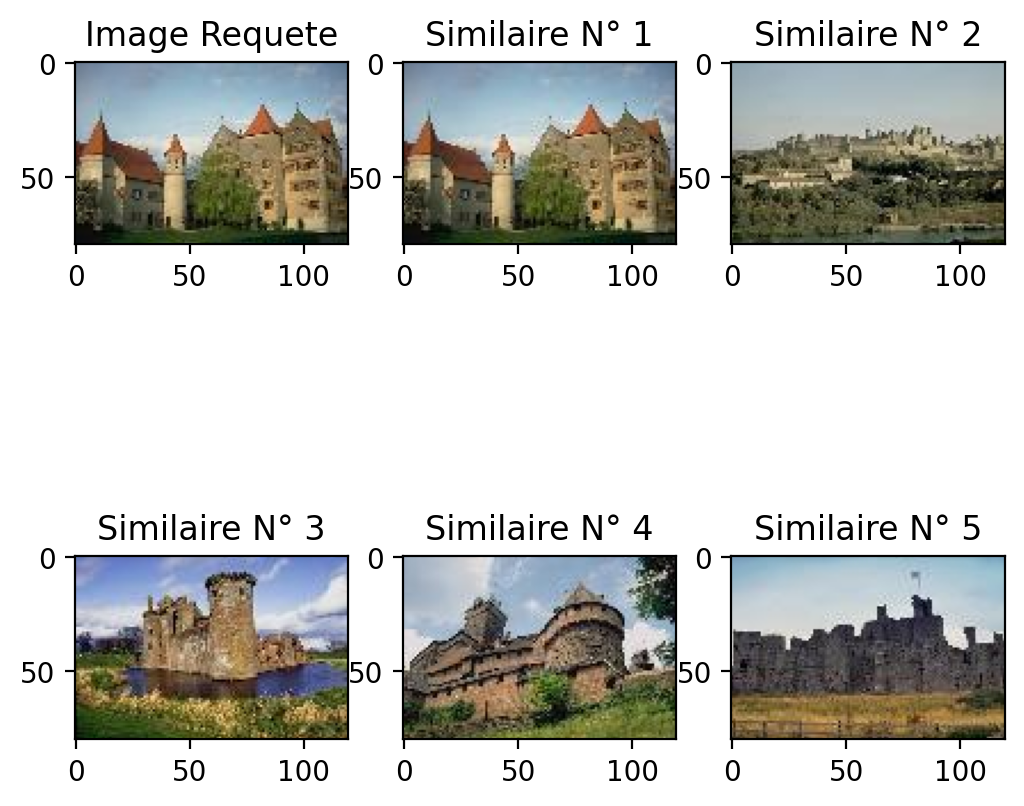

In [14]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=distanes_CBIR[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

In [15]:
# Nous allons modifier l'image requéte pour voir le comportement de notre système
imgrq = image.imread('C:\\Users\\Zizu\\Downloads\\s3 cours et projets\\image mining\\obj_decoys\\382044.jpg')
#plt.imshow(img_requete)
distanes_CBIR=CBIR_RechercheRGB(imgrq, index_Matrix)

0: 0.0
28: 0.0
239: 9.563190301611742
30: 13.876376510202133
55: 17.76580618113157
49: 18.21338697816773
258: 18.29759050732267
255: 19.68230590998268
254: 20.05909795499036
39: 20.60707567743692
262: 21.991406991043107
227: 23.299339479723237
12: 23.363069132525734
44: 23.76785510038631
134: 23.871784948943844
58: 25.113333627133887
92: 25.132090525943806
7: 25.93456562160452
56: 25.945080763570967
6: 25.96726039914735
22: 26.113445415031507
269: 26.215906791322922
85: 26.360319207673566
31: 26.518085164770287
106: 26.545529761644556
46: 26.555489484256928
221: 26.579293913055846
249: 26.588286567724754
41: 27.53608127313274
252: 27.932768048188965
83: 28.10400810764173
67: 29.04940581926661
3: 29.3355418987919
61: 29.382273140949902
264: 30.310680049594918
42: 30.48456178269193
74: 30.584455296615292
234: 30.75617874964519
248: 30.894821002852893
111: 30.993631854312866
230: 31.263968770728642
232: 31.420723990025436
268: 31.646959237033602
88: 31.687703914969347
48: 31.8019870854104

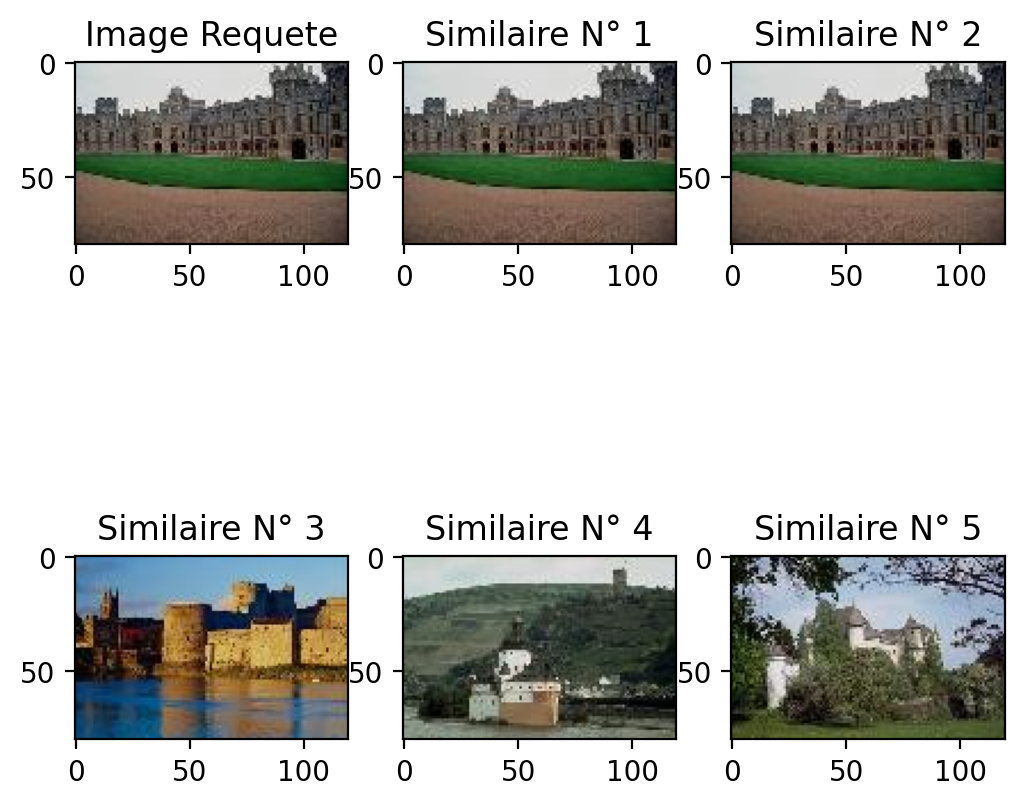

In [16]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(imgrq)
ax1.set_title('Image Requete')
for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    s=distanes_CBIR[i]
    ax1.imshow(loaded_images[s])
    ax1.set_title('Similaire N° %s' %(i+1))

L’utilisation des moments statistiques semblent donner de bons résultats que la recherche par image entière. Reste à tester la robustesse vis-à-vis des transformations comme la rotation, la translation et le changement d’échelle. 

<a name='7'></a>



<h2>3.4	Recherche par Histogramme</h2>




L’histogramme est souvent utilisé pour regrouper le nombre de pixels par intensité. L’histogramme peut être élaboré sur n’importe quel espace couleur ; RGB, HSV, … et même à niveau de gris. Des etudes ont montré que l’espace de couleur HSV est le plus adapté à ce type de système de recherche. L’histogramme est un vecteur dont la taille est égale au nombre de valeur d’intensité dans l’image. Pour l’utiliser comme vecteur descripteur, l’idée est de quantifier l’histogramme en un nombre limité. La taille du vecteur descripteur a été largement discutée et la taille adopté est de 32 caractéristiques. Une quantification par niveau pour chaque composante H, S et V est élaborée. Pour la composante H (hue) le niveau choisi est 8, pour la composante S (saturation) le niveau est 2 et pour la composante V (value) le niveau est 2. <br>
Modifier le code  pour permettre d’avoir un système CBIR utilisant un vecteur descripteur de taille 1x38 composé de couleur et d’histogramme. Il faut modifier la valeur de « fsize » à 39 pour avoir un vecteur de 38 descripteurs (6 pour les moments et 32 pour l’histogramme). Il faut aussi ajouter la fonction « hsvHistogramFeatures » qui admet comme argument d’entrer une image et qui retourne le vecteur descripteur créé à partir de l’histogramme. La fonction « getFeatures » doit être modifiée pour concaténer les deux vecteurs descripteurs de moments et d’histogramme.


In [17]:
del(loaded_images)

In [18]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles

In [19]:
##essai de programmation de HSV conversion

def rgb_to_hsv(r, g, b):
 
  
    r, g, b = r / 255.0, g / 255.0, b / 255.0
 
    # h, s, v = hue, saturation, value
    
    cmax = max(r, g, b)   
    cmin = min(r, g, b)   
    diff = cmax-cmin       
 
    # if cmax and cmax are equal then h = 0
    if cmax == cmin:
        h = 0
     
    # if cmax equal r then compute h
    elif cmax == r:
        h = (60 * ((g - b) / diff) + 360) % 360
 
    # if cmax equal g then compute h
    elif cmax == g:
        h = (60 * ((b - r) / diff) + 120) % 360
 
    # if cmax equal b then compute h
    elif cmax == b:
        h = (60 * ((r - g) / diff) + 240) % 360
 
    # if cmax equal zero
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * 100
 
    # compute v
    v = cmax * 100
    return h, s, v


In [20]:
loaded_HSV = loaded_images.copy()
for i in range(len(loaded_images)):
    loaded_HSV[i]=cv2.cvtColor(loaded_images[i], cv2.COLOR_BGR2HSV)

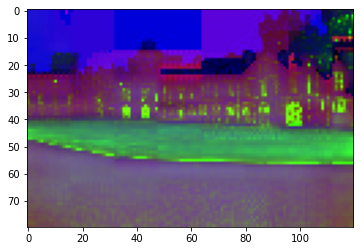

In [21]:
hsvImage = loaded_HSV[0]

plt.imshow(hsvImage)

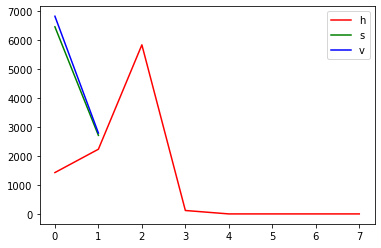

In [22]:
h, s, v = hsvImage[:,:,0], hsvImage[:,:,1], hsvImage[:,:,2]

hist_h = cv2.calcHist([h],[0],None,[8],[0,360])
hist_s = cv2.calcHist([s],[0],None,[2],[0,180])
hist_v = cv2.calcHist([v],[0],None,[2],[0,255])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

hist=cv2.calcHist([hsvImage],[0,1,2],None,[8,2,2],[0,360,0,180,0,256])

In [23]:
features=hist.flatten()
features.shape

(32,)

In [24]:
mean = np.mean(hsvImage, axis=(0, 1))
std = np.std(hsvImage, axis=(0, 1))

In [25]:
features=np.concatenate((features, mean, std))
features.shape

(38,)

In [26]:
def indexationhsv():
    indexes=[]
    loaded_HSV = loaded_images.copy()
    
    for i in range(len(loaded_images)):
        loaded_HSV[i]=cv2.cvtColor(loaded_images[i], cv2.COLOR_BGR2HSV)
        
    for i in range (len(loaded_HSV)):
        
        hist=cv2.calcHist([loaded_HSV[i]],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
        features=hist.flatten()
        
        
        indexes.append(features)
        
        
    return indexes

In [27]:
def searchhsv(imgrequete, indexes):
    
    
    imgrequete=cv2.cvtColor(imgrequete, cv2.COLOR_BGR2HSV)
    hist=cv2.calcHist([imgrequete],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
    
    features=hist.flatten()
    
    
    distances = {}
    
    for i in range(len(indexes)):
        
        d=dist.euclidean(indexes[i], features)
        
        distances[i] = d
    
    s=[]    
    for k, v in sorted(distances.items(), key=lambda x: x[1]):
        print("%s: %s" % (k, v))
        s.append(k)
    return s

In [28]:
img_requete = image.imread('C:\\Users\\Zizu\\Downloads\\s3 cours et projets\\image mining\\ImageRequete.jpg')
    

In [29]:
indexes=indexationhsv()

s = searchhsv(img_requete, indexes)


59: 0.0
100: 815.173583984375
48: 971.8816528320312
82: 1074.2010498046875
1: 1092.1666259765625
84: 1290.6820068359375
269: 1375.425048828125
64: 1380.628173828125
232: 1588.3060302734375
106: 1647.1854248046875
99: 1759.8170166015625
120: 1783.0726318359375
257: 1809.7684326171875
241: 1835.955322265625
24: 1839.248779296875
265: 1876.4786376953125
65: 1884.19482421875
79: 1904.156982421875
78: 1946.72802734375
131: 1952.67919921875
62: 1985.159912109375
247: 1985.5850830078125
123: 2029.0701904296875
21: 2034.2880859375
233: 2055.652099609375
94: 2074.958251953125
72: 2098.47607421875
256: 2100.148681640625
89: 2122.127685546875
101: 2161.19189453125
93: 2165.138427734375
221: 2187.58447265625
20: 2194.791015625
238: 2197.83203125
219: 2206.4423828125
5: 2206.823974609375
91: 2209.77880859375
18: 2234.738037109375
81: 2238.646484375
57: 2256.017822265625
229: 2256.21044921875
179: 2269.2236328125
222: 2270.168212890625
110: 2282.00439453125
227: 2302.955078125
251: 2312.700927734375

In [30]:
len(indexes)

270

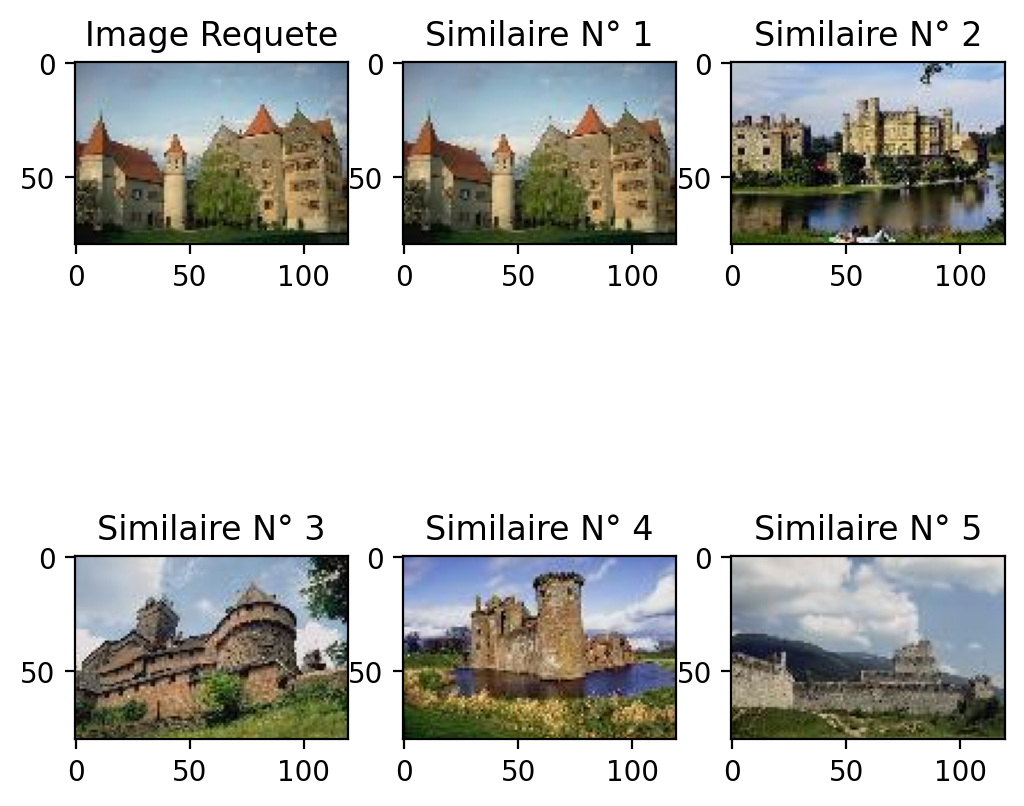

In [31]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')

for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    f = s[i]
    ax1.imshow(loaded_images[f])
    ax1.set_title('Similaire N° %s' %(i+1))

<a name='8'></a>

<h2>3.5	 Recherche par texture</h2>








.

In [32]:
del(loaded_images)

In [33]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles

In [34]:
#co-occurrence matrix

def calculeMatrixC(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # choose a positional operator
    pos_op = [1,0]

    # init glcm array
    glcm = np.zeros([256,256])

    # iterate over image and complete glcm

    for i in range(gray_image.shape[0]):
    
        for j in range(gray_image.shape[1]):
        
            init_val = img[i,j]
        
            try:
                target = img[i+pos_op[0],j+pos_op[1]]
            except IndexError:
                continue # out of img bounds
            glcm[init_val, target]+=1
            
    glcm = glcm/np.sum(glcm)
    
    return glcm

In [35]:
def contrast(matrixC):

    # iterate over complete glcm
    contrast=0
    
    for i in range(matrixC.shape[0]):
    
        for j in range(matrixC.shape[1]):
            contrast += matrixC[i, j] * (i-j)**2
            
    return contrast

In [36]:
def homogeneity(matrixC):
    homoginty=0
    
    for i in range(matrixC.shape[0]):
        for j in range(matrixC.shape[1]):
            homoginty += matrixC[i, j]/(1+(i-j)**2)
            
    return homoginty

In [37]:
def Energy(matrixC):
    asm = np.sum(matrixC**2, axis=(0,1))
    energ=np.sqrt(asm)
    return energ

In [38]:
def correlation(matrixC):
    
    mu_i = np.sum(matrixC, axis=(0,1))
    
    
    
    segma_i = 0
    
    for i in range (matrixC.shape[0]):
        for j in range(matrixC.shape[1]):
            
            segma_i += (i - mu_i)**2 * matrixC[i][j]
            
    segma_i = np.sqrt(segma_i)
     
    segma_j = 0
    
    for i in range (matrixC.shape[0]):
        for i in range(matrixC.shape[1]):
            segma_j += (j - mu_j)**2 * matrixC[i][j]
            
    segma_j = np.sqrt(segma_j)
            
    correlation_value = 0

    for i in range (matrixC.shape[0]):
        for i in range(matrixC.shape[1]):
            correlation_value += matrixC[i][j]*(i - mu_i)*(j - mu_j)
            
            
    return correlation_value
    

In [39]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte

In [40]:
def indexationTexture():
    indexes=[]
    
    for i in range (len(loaded_images)):
        image = color.rgb2gray(loaded_images[i])
        im = img_as_ubyte(image)
        
        g = greycomatrix(im, distances=[1], angles=[np.pi/2])
        
        contrast = greycoprops(g, 'contrast')
        energy = greycoprops(g, 'energy')
        homogeneity = greycoprops(g, 'homogeneity')
        correlation = greycoprops(g, 'correlation')
        
        x = np.concatenate((contrast, energy, homogeneity, correlation))
        
        indexes.append(x)
        
    return indexes

In [41]:
def rechercheTexture(image_requette, indexes):
    
    gray = color.rgb2gray(image_requette)
    imginteger = img_as_ubyte(gray)
    
    g = greycomatrix(imginteger, distances=[1], angles=[np.pi/2])
        
    contrast = greycoprops(g, 'contrast')
    energy = greycoprops(g, 'energy')
    homogeneity = greycoprops(g, 'homogeneity')
    correlation = greycoprops(g, 'correlation')
        
    x = np.concatenate((contrast, energy, homogeneity, correlation))
    
    
    distances = {}
    
    for i in range(len(indexes)):
        
        d=dist.euclidean(indexes[i], x)
        
        distances[i] = d
    
    s=[]    
    for k, v in sorted(distances.items(), key=lambda x: x[1]):
        print("%s: %s" % (k, v))
        s.append(k)
    return s

In [42]:
indexes = indexationTexture()

In [53]:
indexes[0]

array([[6.06775738e+02],
       [3.31529193e-02],
       [1.84634771e-01],
       [9.00737282e-01]])

In [43]:
s = rechercheTexture(img_requete, indexes)

59: 0.0
186: 4.726058089585916
152: 7.155303746182038
179: 7.5566874213671555
139: 7.732058279402021
260: 8.463453626856156
146: 10.186668183872692
202: 12.605500202478874
0: 12.655548278840657
28: 12.655548278840657
17: 14.009450170312295
166: 15.103910595304288
206: 17.33803357464752
8: 18.05925168451658
214: 21.8533780539776
41: 21.948451916929905
205: 22.928446050568727
103: 23.666248800827397
77: 26.683888849813286
239: 27.096153508854286
197: 28.27363315537226
170: 30.428291738462878
190: 32.63113390849722
207: 32.94392418846942
143: 34.36104995904984
176: 34.37450120517584
27: 34.39104730470098
144: 34.50341973733182
195: 34.71680591211528
192: 35.12641566304627
51: 35.23054290306458
38: 35.64843547275232
161: 37.09909085297307
261: 37.18386426569718
219: 37.8877213967856
1: 40.79156927409864
9: 45.20423305071048
231: 46.260061193375186
196: 49.03138194047647
75: 49.91031114416037
54: 50.02789071647992
159: 53.982205440249636
168: 55.493044697438194
63: 56.85126250538854
137: 60

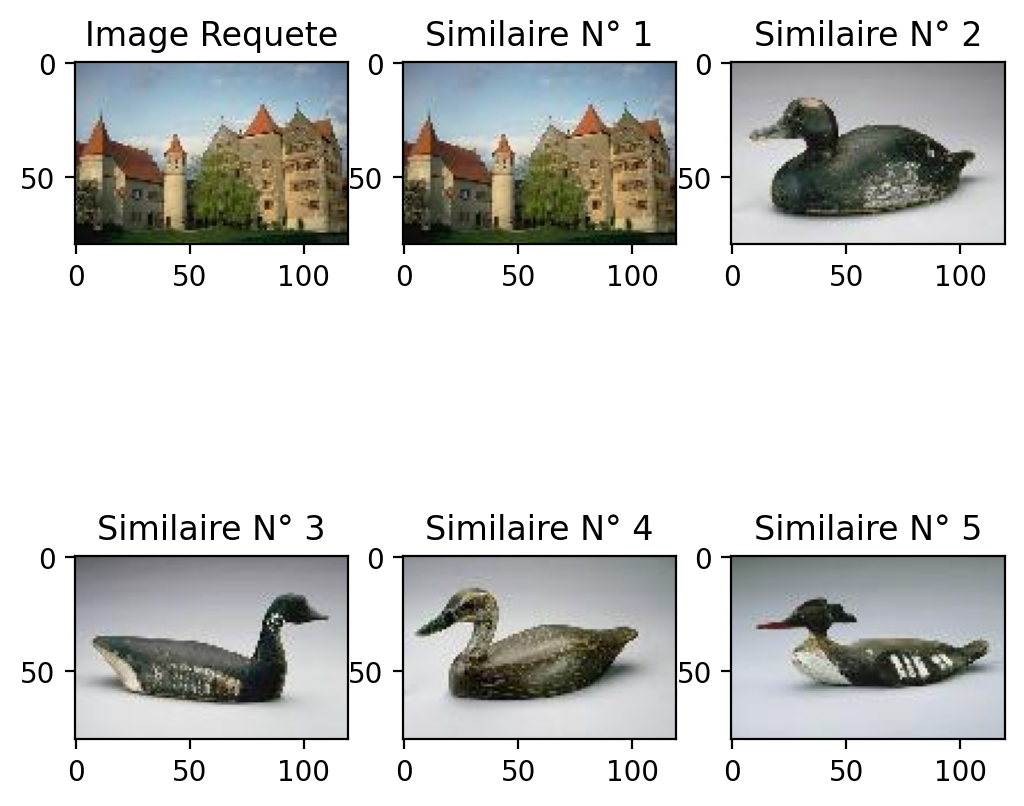

In [44]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')

for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    f = s[i]
    ax1.imshow(loaded_images[f])
    ax1.set_title('Similaire N° %s' %(i+1))

<a name='9'></a>

.

<h2>3.5	 Recherche par forme</h2>

In [45]:
import cv2

In [46]:
del(loaded_images)

In [47]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles

In [48]:
def indexationHumoments():
    
    indexes=[]

    for i in range (len(loaded_images)):
        
        image = color.rgb2gray(loaded_images[i])
        im = img_as_ubyte(image)

    
        moments = cv2.moments(im) 
        # Calculate Hu Moments 
        huMoments = cv2.HuMoments(moments)
        indexes.append(huMoments)
        
    return indexes


In [49]:
def search_byHumoments(imgrequete, indexes):
    
    image = color.rgb2gray(imgrequete)
    im = img_as_ubyte(image)
    moments = cv2.moments(im) 

    huMoments = cv2.HuMoments(moments)
    
    distances={}
    
    for i in range(len(indexes)):
        
        d = dist.euclidean(indexes[i], huMoments)
        
        distances[i] = d
    
    s=[]
    
    for k, v in sorted(distances.items(), key=lambda x: x[1]):
        print("%s: %s" % (k, v))
        s.append(k)
    return s

In [55]:
indexs = indexationHumoments()

In [56]:
indexs[0]

array([[ 1.65974667e-03],
       [ 2.31693081e-07],
       [ 1.20338126e-11],
       [ 6.81804166e-11],
       [-1.06236341e-21],
       [ 9.89091658e-15],
       [-1.63871816e-21]])

In [51]:
s = search_byHumoments(img_requete, indexs)

59: 0.0
93: 2.2623408267257713e-06
182: 2.3298140882804475e-06
200: 3.1235842838534707e-06
199: 4.062691752378753e-06
51: 4.882591155320739e-06
265: 5.095773843546298e-06
153: 5.596552822390351e-06
191: 7.188176102071702e-06
24: 8.219148020400328e-06
120: 8.284435183560234e-06
101: 8.859147642503171e-06
219: 1.1097690064078811e-05
124: 1.4355328048830971e-05
197: 1.6075039122432166e-05
1: 1.653786404937753e-05
135: 1.6608368196173868e-05
178: 1.8522616459016463e-05
165: 1.8796260316871548e-05
201: 2.0714379929158604e-05
131: 2.1608826150532385e-05
203: 2.2391415711720567e-05
180: 2.596564728100596e-05
243: 2.7294914293930933e-05
13: 3.141926150106077e-05
207: 3.151287463619252e-05
62: 3.176748760313643e-05
233: 3.406396138403146e-05
149: 3.8953408125303685e-05
72: 4.1593422352961307e-05
103: 4.486183300879021e-05
84: 4.694846270262662e-05
102: 4.9875084862475885e-05
202: 5.2355886124763236e-05
137: 5.3698622313654005e-05
79: 5.4069391283714156e-05
196: 5.414948150155418e-05
151: 5.4705

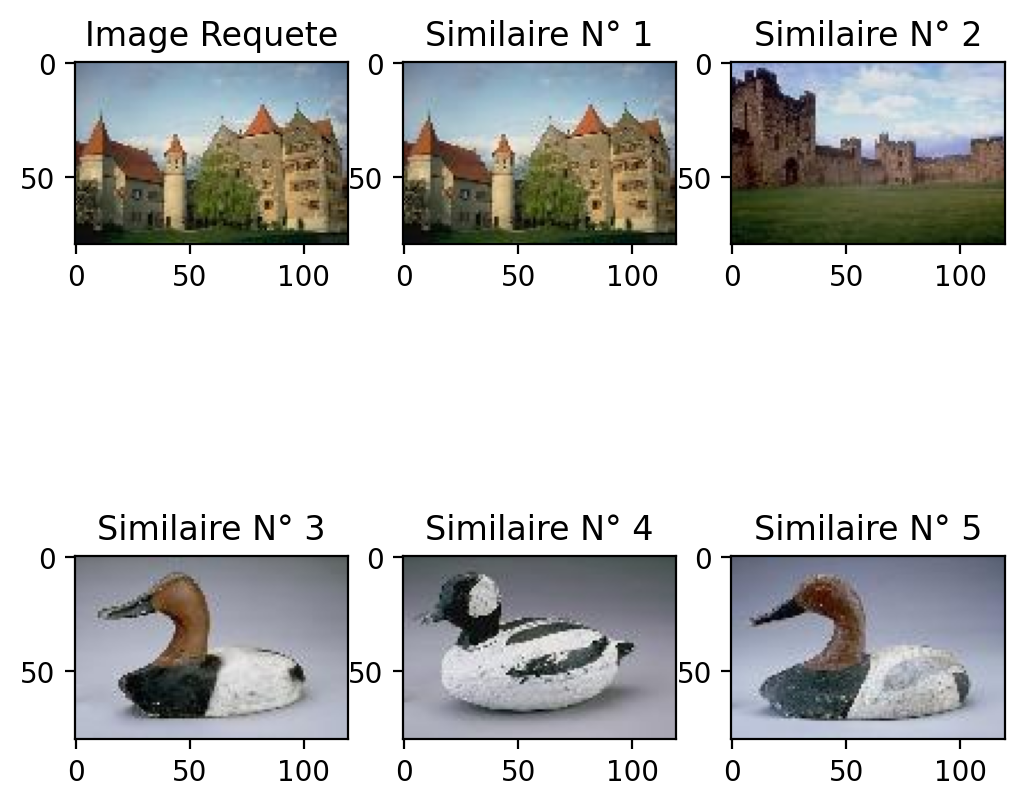

In [51]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')

for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    f = s[i]
    ax1.imshow(loaded_images[f])
    ax1.set_title('Similaire N° %s' %(i+1))

<a name='10'></a>

# concatenation de vecteur caractéristique :

In [52]:
del(loaded_images)

In [53]:
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//obj_decoys'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    
    

img_requete = image.imread('C:\\Users\\Zizu\\Downloads\\s3 cours et projets\\image mining\\ImageRequete.jpg')

In [54]:
def indexationgenerale():
    indexesColeur = CBIR_IndexationRGB()
    indexesHistogramme = indexationhsv()
    indexesTexture = indexationTexture()
    indexesForme = indexationHumoments()
    
    indexesColeur = np.array(indexesColeur)
    indexesHistogramme = np.array(indexesHistogramme)
    indexesTexture = np.array(indexesTexture)
    indexesForme = np.array(indexesForme)
    
    indexesForme = indexesForme.reshape(indexesForme.shape[0], 7)

    indexesTexture = indexesTexture.reshape(indexesTexture.shape[0], 4)
    
    
    vecteur_caracteristique = np.hstack((indexesColeur,indexesHistogramme, indexesTexture, indexesForme))
    
    return vecteur_caracteristique



def recherche_all(imgrequete, vecteur_caracteristique):
    
    feat1 = color_Moments(imgrequete)
    feat1 = feat1.reshape(1, feat1.shape[0])
    
    imgrequetegray = cv2.cvtColor(imgrequete, cv2.COLOR_BGR2HSV)
    
    hist=cv2.calcHist([imgrequetegray],[0,1,2],None,[8,2,2],[0,180,0,256,0,256])
    feat2=hist.flatten()
    feat2 = feat2.reshape(1, feat2.shape[0])
    
    
    gray = color.rgb2gray(imgrequete)
    imginteger = img_as_ubyte(gray)
    g = greycomatrix(imginteger, distances=[1], angles=[np.pi/2]) 
    contrast = greycoprops(g, 'contrast')
    energy = greycoprops(g, 'energy')
    homogeneity = greycoprops(g, 'homogeneity')
    correlation = greycoprops(g, 'correlation')
        
    feat3 = np.concatenate((contrast, energy, homogeneity, correlation))
    feat3 = feat3.reshape(1, feat3.shape[0])
    
    image = color.rgb2gray(imgrequete)
    im = img_as_ubyte(image)
    moments = cv2.moments(im) 
    huMoments = cv2.HuMoments(moments)
    
    feat4 = huMoments
    feat4 = feat4.reshape(1, feat4.shape[0])
    
    features = np.hstack((feat1, feat2, feat3, feat4))

    
    
    distances={}
    
    for i in range(len(vecteur_caracteristique)):
        
        d = dist.euclidean(vecteur_caracteristique[i], features)
        
        distances[i] = d
        s=[]
        
    for k, v in sorted(distances.items(), key=lambda x:x[1]):
        print("%s: %s" % (k, v))
        s.append(k)
    return s

In [55]:
vecteur_caracteristique= indexationgenerale()
vecteur_caracteristique.shape

(270, 49)

In [56]:
s = recherche_all(img_requete, vecteur_caracteristique)

59: 0.0
100: 1068.427895854116
1: 1093.1569953612902
82: 1153.2178230602717
48: 1337.3039875454979
84: 1392.6925548003553
64: 1393.5735030652058
269: 1403.9014694833218
232: 1615.518262780457
99: 1822.0637905262902
106: 1835.2298854832989
24: 1850.5283871030704
65: 1890.3374022111539
79: 1922.3296688808473
265: 1925.4614082493983
78: 1967.3990050220928
120: 1994.3933376804848
62: 2005.4174735628517
257: 2028.9069961958241
131: 2032.9083947544386
233: 2061.688757269816
21: 2065.0472102805693
72: 2118.6066848161195
89: 2123.4951236157826
241: 2144.4542733569156
101: 2164.7459035640923
256: 2167.6889916370474
93: 2183.497731144941
20: 2203.833600971563
123: 2204.818977347724
219: 2207.395521485171
94: 2221.8126784488672
18: 2235.772231509385
238: 2241.509265305117
179: 2270.367017703255
222: 2271.6068218459714
5: 2278.6056884933314
91: 2291.5448146376
229: 2312.5350433488925
57: 2330.4509355038977
227: 2350.0453233143485
243: 2381.8676392627335
129: 2385.6324196983855
247: 2395.1794349750

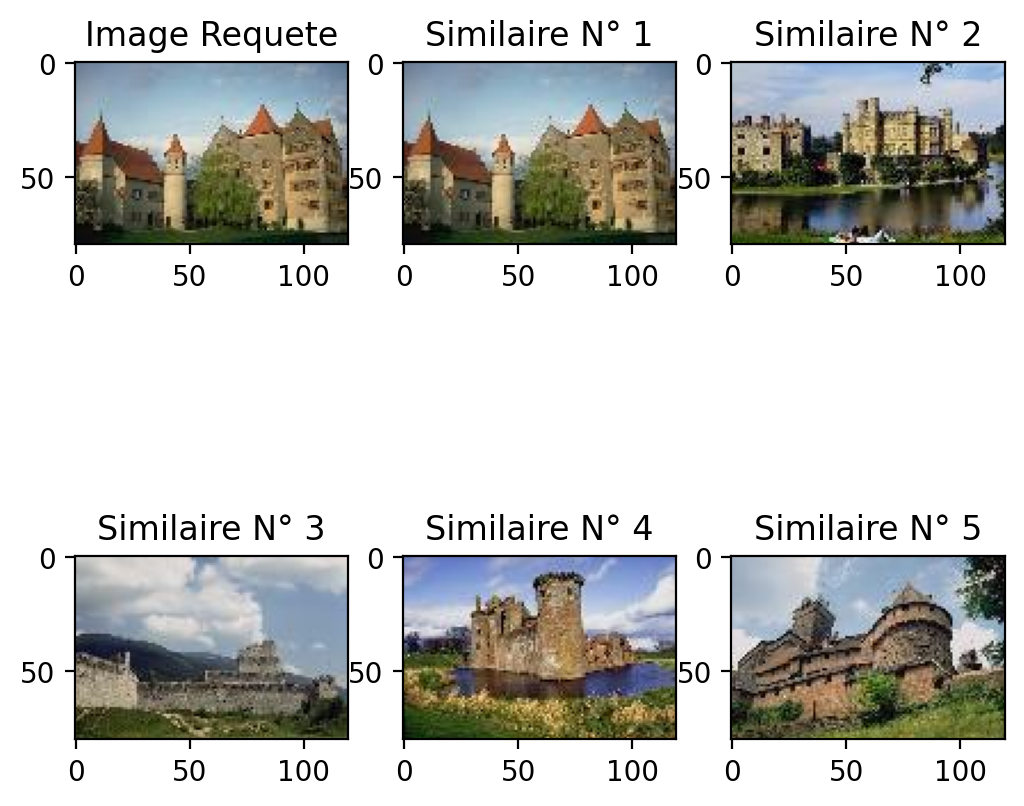

In [57]:
fig = plt.figure(figsize=(6, 6), dpi=200)
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(img_requete)
ax1.set_title('Image Requete')

for i in range(5):
    ax1 = fig.add_subplot(2, 3, i+2)
    f = s[i]
    ax1.imshow(loaded_images[f])
    ax1.set_title('Similaire N° %s' %(i+1))

### utiliser CIBIR de premier atelier pour extraire le vecteur caractéristique des images et l'enregistrer CSV

In [58]:
loaded_images=list()
path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//classification//DB2C//obj_car'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    print(' %s %s ' % (filename, img_data.shape))

 273001.jpg (80, 120, 3) 
 273011.jpg (80, 120, 3) 
 273020.jpg (80, 120, 3) 
 273021.jpg (80, 120, 3) 
 273022.jpg (80, 120, 3) 
 273026.jpg (80, 120, 3) 
 273027.jpg (80, 120, 3) 
 273061.jpg (80, 120, 3) 
 273062.jpg (80, 120, 3) 
 273063.jpg (80, 120, 3) 
 273064.jpg (80, 120, 3) 
 273065.jpg (80, 120, 3) 
 273066.jpg (80, 120, 3) 
 273067.jpg (80, 120, 3) 
 273097.jpg (80, 120, 3) 
 273098.jpg (80, 120, 3) 
 29000.jpg (80, 120, 3) 
 29001.jpg (80, 120, 3) 
 29002.jpg (80, 120, 3) 
 29003.jpg (80, 120, 3) 
 29005.jpg (80, 120, 3) 
 29006.jpg (80, 120, 3) 
 29007.jpg (80, 120, 3) 
 29008.jpg (80, 120, 3) 
 29009.jpg (80, 120, 3) 
 29010.jpg (80, 120, 3) 
 29012.jpg (80, 120, 3) 
 29014.jpg (80, 120, 3) 
 29015.jpg (120, 80, 3) 
 29017.jpg (80, 120, 3) 
 29019.jpg (80, 120, 3) 
 29020.jpg (80, 120, 3) 
 29021.jpg (80, 120, 3) 
 29022.jpg (80, 120, 3) 
 29023.jpg (80, 120, 3) 
 29024.jpg (80, 120, 3) 
 29026.jpg (80, 120, 3) 
 29027.jpg (80, 120, 3) 
 29029.jpg (80, 120, 3) 
 29030.jp

 521083.jpg (80, 120, 3) 
 521084.jpg (80, 120, 3) 
 521085.jpg (80, 120, 3) 
 521086.jpg (80, 120, 3) 
 521087.jpg (80, 120, 3) 
 521088.jpg (80, 120, 3) 
 521089.jpg (80, 120, 3) 
 521091.jpg (80, 120, 3) 
 521092.jpg (80, 120, 3) 
 521093.jpg (80, 120, 3) 
 521094.jpg (80, 120, 3) 
 521095.jpg (80, 120, 3) 
 521096.jpg (80, 120, 3) 
 521097.jpg (80, 120, 3) 
 521098.jpg (80, 120, 3) 
 521099.jpg (80, 120, 3) 


In [59]:
vecteur_caracteristique= indexationgenerale()
vecteur_caracteristique.shape

(400, 49)

In [60]:
y=np.zeros((400,1), dtype='float')

In [61]:
y.shape

(400, 1)

In [62]:
cars = np.hstack((vecteur_caracteristique, y))

In [63]:
cars.shape

(400, 50)

In [64]:
np.savetxt('cars.csv', cars, delimiter=",")

In [65]:
del(loaded_images)

In [61]:
loaded_images=list()
path='C://Users//Zizu//Downloads//s3 cours et projets//image mining//classification//DataToPredict'
for filename in listdir(path):
    # load image
    img_data = image.imread(path+'/' + filename)
    # store loaded image
    loaded_images.append(img_data)
    # Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
    print(' %s %s ' % (filename, img_data.shape))

 29011.jpg (80, 120, 3) 
 29013.jpg (80, 120, 3) 
 29055.jpg (120, 80, 3) 
 354001.jpg (80, 120, 3) 
 354053.jpg (80, 120, 3) 
 447012.jpg (80, 120, 3) 
 447063.jpg (80, 120, 3) 
 521022.jpg (80, 120, 3) 
 521079.jpg (80, 120, 3) 
 521090.jpg (80, 120, 3) 
 535000.jpg (80, 120, 3) 
 535010.jpg (80, 120, 3) 
 535015.jpg (80, 120, 3) 
 535031.jpg (80, 120, 3) 
 535041.jpg (80, 120, 3) 
 535078.jpg (80, 120, 3) 
 535082.jpg (80, 120, 3) 
 535091.jpg (80, 120, 3) 
 535095.jpg (120, 80, 3) 
 535099.jpg (80, 120, 3) 


In [62]:
vecteur_caracteristique= indexationgenerale()
vecteur_caracteristique.shape

(20, 49)

In [94]:
y=np.ones((90,1), dtype='float')

In [95]:
y.shape

(90, 1)

In [96]:
ships=np.hstack((vecteur_caracteristique, y))

In [97]:
ships.shape

(90, 50)

In [63]:
np.savetxt('topredict.csv', vecteur_caracteristique, delimiter=",")

In [60]:
del(loaded_HSV)